# Project Title: Unemployment Rate Analysis by Region
# Domain: Economics
# Description: Track how unemployment rates change over time regionally.
# Sample Analysis Goals: Compare pre- and post-crisis periods, trends by state.

Unemployment is a persistent global issue that significantly impacts economic stability, individual
livelihoods, and social cohesion.
 The
level and nature of unemployment vary across regions, driven by both global and local factors. As economies
evolve, new technologies emerge, and international trade patterns shift, unemployment patterns also change,
creating significant challenges for policymakers and societies.

 For
instance, the global financial crisis of 2008-2009 led to sharp increases in unemployment across the world,
particularly in developed countries.

More recently, the COVID-19 pandemic caused significant job losses in both
developed and developing economies, with vulnerable sectors such as hospitality, tourism, and retail experiencing
the most severe impacts.

# Data loading

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("/content/API_SL.UEM.TOTL.ZS_DS2_en_csv_v2_309155.csv", skiprows=4)
display(df.info())
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 70 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   1960            0 non-null      float64
 5   1961            0 non-null      float64
 6   1962            0 non-null      float64
 7   1963            0 non-null      float64
 8   1964            0 non-null      float64
 9   1965            0 non-null      float64
 10  1966            0 non-null      float64
 11  1967            0 non-null      float64
 12  1968            0 non-null      float64
 13  1969            0 non-null      float64
 14  1970            0 non-null      float64
 15  1971            0 non-null      float64
 16  1972            0 non-null      float64
 17  1973            0 non-null      flo

None

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 69
0,Aruba,ABW,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,7.194666,7.346331,7.360513,7.584419,8.191395,8.577385,7.985202,7.806365,7.772654,NaN
2,Afghanistan,AFG,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,10.133000,11.184000,11.196000,11.185000,11.710000,11.994000,14.100000,13.991000,13.295000,NaN
3,Africa Western and Central,AFW,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,4.157574,4.274196,4.323631,4.395271,4.852393,4.736732,3.658573,3.277245,3.218313,NaN
4,Angola,AGO,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,16.575000,16.610000,16.594000,16.497000,16.690000,15.799000,14.602000,14.537000,14.464000,NaN


# Missing values in the dataset

In [24]:
display("Missing values in the columns",df.isnull().sum())
display("Total missing values in the dataset",df.isnull().sum().sum())

'Missing values in the columns'

,0
Country Name,0
Country Code,0
Indicator Name,0
Indicator Code,0
1960,266
...,...
2021,31
2022,32
2023,34
2024,36


'Total missing values in the dataset'

np.int64(9575)

# Data cleaning
There is no data for year 1960-1990.
So, i removed these columns from the dataset.

In [25]:
# Drop columns with all NaN values
df.dropna(axis=1, how='all', inplace=True)
display(df.head())

display("Missing values",df.isnull().sum())

,Country Name,Country Code,Indicator Name,Indicator Code,1991,1992,1993,1994,1995,1996,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Aruba,ABW,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,8.179629,8.270724,8.266327,8.138291,7.908446,7.823908,...,7.036357,7.194666,7.346331,7.360513,7.584419,8.191395,8.577385,7.985202,7.806365,7.772654
2,Afghanistan,AFG,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,8.070000,8.011000,7.888000,7.822000,7.817000,7.867000,...,9.052000,10.133000,11.184000,11.196000,11.185000,11.710000,11.994000,14.100000,13.991000,13.295000
3,Africa Western and Central,AFW,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,4.158680,4.251102,4.369805,4.393781,4.399749,4.340691,...,4.164467,4.157574,4.274196,4.323631,4.395271,4.852393,4.736732,3.658573,3.277245,3.218313
4,Angola,AGO,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,16.855000,16.978000,17.399000,17.400000,16.987000,16.275000,...,16.490000,16.575000,16.610000,16.594000,16.497000,16.690000,15.799000,14.602000,14.537000,14.464000


'Missing values'

,0
Country Name,0
Country Code,0
Indicator Name,0
Indicator Code,0
1991,31
1992,31
1993,31
1994,31
1995,31
1996,31


For some countries, data is not available. For example, Aruba. So, i removed those countries.

In [26]:
df.dropna(axis=0, how='all', inplace=True)
display(df.head())
display("Missing values",df.isnull().sum())

,Country Name,Country Code,Indicator Name,Indicator Code,1991,1992,1993,1994,1995,1996,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Aruba,ABW,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,8.179629,8.270724,8.266327,8.138291,7.908446,7.823908,...,7.036357,7.194666,7.346331,7.360513,7.584419,8.191395,8.577385,7.985202,7.806365,7.772654
2,Afghanistan,AFG,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,8.070000,8.011000,7.888000,7.822000,7.817000,7.867000,...,9.052000,10.133000,11.184000,11.196000,11.185000,11.710000,11.994000,14.100000,13.991000,13.295000
3,Africa Western and Central,AFW,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,4.158680,4.251102,4.369805,4.393781,4.399749,4.340691,...,4.164467,4.157574,4.274196,4.323631,4.395271,4.852393,4.736732,3.658573,3.277245,3.218313
4,Angola,AGO,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,16.855000,16.978000,17.399000,17.400000,16.987000,16.275000,...,16.490000,16.575000,16.610000,16.594000,16.497000,16.690000,15.799000,14.602000,14.537000,14.464000


'Missing values'

,0
Country Name,0
Country Code,0
Indicator Name,0
Indicator Code,0
1991,31
1992,31
1993,31
1994,31
1995,31
1996,31


In [27]:
# Year columns
year_columns = df.columns[df.columns.get_loc('Indicator Code') + 1:]

# Drop nan values containing rows
df.dropna(subset=year_columns, how='all', inplace=True)
display(df.head())
display("Missing values",df.isnull().sum())

,Country Name,Country Code,Indicator Name,Indicator Code,1991,1992,1993,1994,1995,1996,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
1,Africa Eastern and Southern,AFE,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,8.179629,8.270724,8.266327,8.138291,7.908446,7.823908,...,7.036357,7.194666,7.346331,7.360513,7.584419,8.191395,8.577385,7.985202,7.806365,7.772654
2,Afghanistan,AFG,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,8.070000,8.011000,7.888000,7.822000,7.817000,7.867000,...,9.052000,10.133000,11.184000,11.196000,11.185000,11.710000,11.994000,14.100000,13.991000,13.295000
3,Africa Western and Central,AFW,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,4.158680,4.251102,4.369805,4.393781,4.399749,4.340691,...,4.164467,4.157574,4.274196,4.323631,4.395271,4.852393,4.736732,3.658573,3.277245,3.218313
4,Angola,AGO,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,16.855000,16.978000,17.399000,17.400000,16.987000,16.275000,...,16.490000,16.575000,16.610000,16.594000,16.497000,16.690000,15.799000,14.602000,14.537000,14.464000
5,Albania,ALB,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,10.304000,30.007000,25.251000,20.835000,14.607000,13.928000,...,17.193000,15.418000,13.616000,12.304000,11.466000,11.690000,11.474000,10.137000,10.108000,10.250000


'Missing values'

,0
Country Name,0
Country Code,0
Indicator Name,0
Indicator Code,0
1991,0
1992,0
1993,0
1994,0
1995,0
1996,0


Still, there are some missing values in the dataset.

In [28]:
#  rows with any NaN values
rows_nan = df[df.isnull().any(axis=1)]
display(rows_nan)

,Country Name,Country Code,Indicator Name,Indicator Code,1991,1992,1993,1994,1995,1996,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
130,Lebanon,LBN,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,8.609,8.259,8.262,8.350,8.442,8.435,...,9.306,9.786,10.251,10.745,11.301,13.284,12.669,11.600,11.543,NaN
196,West Bank and Gaza,PSE,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,10.653,10.672,10.685,10.761,10.705,10.731,...,23.005,23.939,25.677,26.256,25.340,25.895,26.390,24.420,NaN,NaN
206,Sudan,SDN,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,15.652,15.702,15.520,15.640,15.650,15.624,...,14.347,13.606,12.953,12.303,11.658,11.958,11.044,7.530,NaN,NaN
216,South Sudan,SSD,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,12.370,12.414,12.242,12.352,12.361,12.336,...,12.485,12.955,13.111,12.952,12.709,14.319,14.029,12.545,12.477,NaN
248,Ukraine,UKR,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,1.900,1.900,2.000,2.000,5.620,7.650,...,9.140,9.350,9.500,8.799,8.194,9.475,9.834,NaN,NaN,NaN


For year 2024, data is not available for 5 countries.

For year 2023, data is not available for 3 countries.

For year 2022, data is not available for 1 country. For Ukraine, year 2022,2023,2024 data is missing. (Maybe due to war)

Check unique values in the dataset.

In [29]:
display("Unique countries",df['Country Name'].unique())
display("Number of countries",df["Country Name"].unique().size)

'Unique countries'

array(['Africa Eastern and Southern', 'Afghanistan',
       'Africa Western and Central', 'Angola', 'Albania', 'Arab World',
       'United Arab Emirates', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Burundi', 'Belgium', 'Benin',
       'Burkina Faso', 'Bangladesh', 'Bulgaria', 'Bahrain',
       'Bahamas, The', 'Bosnia and Herzegovina', 'Belarus', 'Belize',
       'Bolivia', 'Brazil', 'Barbados', 'Brunei Darussalam', 'Bhutan',
       'Botswana', 'Central African Republic', 'Canada',
       'Central Europe and the Baltics', 'Switzerland', 'Channel Islands',
       'Chile', 'China', "Cote d'Ivoire", 'Cameroon', 'Congo, Dem. Rep.',
       'Congo, Rep.', 'Colombia', 'Comoros', 'Cabo Verde', 'Costa Rica',
       'Caribbean small states', 'Cuba', 'Cyprus', 'Czechia', 'Germany',
       'Djibouti', 'Denmark', 'Dominican Republic', 'Algeria',
       'East Asia & Pacific (excluding high income)',
       'Early-demographic dividend', 'East Asia & Pacific',
       'Europe

'Number of countries'

235

#Total number of countries: 235

In [30]:
display("Unique indicators",df['Indicator Name'].unique())
display("Number of indicators",df["Indicator Name"].unique().size)

'Unique indicators'

array(['Unemployment, total (% of total labor force) (modeled ILO estimate)'],
      dtype=object)

'Number of indicators'

1

ILO is International Labour Organization.

In [31]:
display("Unique country code",df['Country Code'].unique())
display("Number of country codes",df["Country Code"].unique().size)

'Unique country code'

array(['AFE', 'AFG', 'AFW', 'AGO', 'ALB', 'ARB', 'ARE', 'ARG', 'ARM',
       'AUS', 'AUT', 'AZE', 'BDI', 'BEL', 'BEN', 'BFA', 'BGD', 'BGR',
       'BHR', 'BHS', 'BIH', 'BLR', 'BLZ', 'BOL', 'BRA', 'BRB', 'BRN',
       'BTN', 'BWA', 'CAF', 'CAN', 'CEB', 'CHE', 'CHI', 'CHL', 'CHN',
       'CIV', 'CMR', 'COD', 'COG', 'COL', 'COM', 'CPV', 'CRI', 'CSS',
       'CUB', 'CYP', 'CZE', 'DEU', 'DJI', 'DNK', 'DOM', 'DZA', 'EAP',
       'EAR', 'EAS', 'ECA', 'ECS', 'ECU', 'EGY', 'EMU', 'ERI', 'ESP',
       'EST', 'ETH', 'EUU', 'FCS', 'FIN', 'FJI', 'FRA', 'GAB', 'GBR',
       'GEO', 'GHA', 'GIN', 'GMB', 'GNB', 'GNQ', 'GRC', 'GTM', 'GUM',
       'GUY', 'HIC', 'HKG', 'HND', 'HPC', 'HRV', 'HTI', 'HUN', 'IBD',
       'IBT', 'IDA', 'IDB', 'IDN', 'IDX', 'IND', 'IRL', 'IRN', 'IRQ',
       'ISL', 'ISR', 'ITA', 'JAM', 'JOR', 'JPN', 'KAZ', 'KEN', 'KGZ',
       'KHM', 'KOR', 'KWT', 'LAC', 'LAO', 'LBN', 'LBR', 'LBY', 'LCA',
       'LCN', 'LDC', 'LIC', 'LKA', 'LMC', 'LMY', 'LSO', 'LTE', 'LTU',
       'LUX', 'LVA',

'Number of country codes'

235

Show top 10 unemployment rate countries

In [32]:
# Calculate the average unemployment rate for each country across the year columns
df['Average Unemployment Rate'] = df[year_columns].mean(axis=1)

# Sort the dataframe by the average unemployment rate in descending order
top_10_unemployment = df.sort_values(by='Average Unemployment Rate', ascending=False).head(10)

# Display the top 10 countries with the highest average unemployment rates
display("Top 10 countries with the highest average unemployment rates:", top_10_unemployment[['Country Name', 'Average Unemployment Rate']])

'Top 10 countries with the highest average unemployment rates:'

,Country Name,Average Unemployment Rate
157,North Macedonia,28.474382
56,Djibouti,26.492971
224,Eswatini,26.123971
263,South Africa,25.025912
162,Montenegro,23.318853
24,Bosnia and Herzegovina,22.747000
171,Namibia,20.851735
44,"Congo, Rep.",20.058529
253,St. Vincent and the Grenadines,19.678294
33,Botswana,19.533647


In [33]:
# Sort the dataframe by the average unemployment rate
last_10_unemployment = df.sort_values(by='Average Unemployment Rate', ascending=True).head(10)

# Display the last 10 countries with the lowest average unemployment rates
display("Last 10 countries with the lowest average unemployment rates:", last_10_unemployment[['Country Name', 'Average Unemployment Rate']])

'Last 10 countries with the lowest average unemployment rates:'

,Country Name,Average Unemployment Rate
200,Qatar,0.540176
123,Cambodia,0.653471
229,Chad,0.901588
160,Myanmar,1.087794
22,Bahrain,1.144353
233,Thailand,1.278676
173,Niger,1.293588
18,Benin,1.364500
209,Solomon Islands,1.608706
127,Kuwait,1.635794


pandas.melt() function: is used to transform data from a wide format to a long format.

id_vars: unchanged columns,

var_name:	Name of the new column containing former column headers,

value_name:	Name of the new column containing values

,Country Name,Country Code,Indicator Name,Indicator Code,Average Unemployment Rate,Year,Unemployment Rate
0,North Macedonia,MKD,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,28.474382,1991,24.500
1,Djibouti,DJI,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,26.492971,1991,25.669
2,Eswatini,SWZ,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,26.123971,1991,20.684
3,South Africa,ZAF,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,25.025912,1991,23.002
4,Montenegro,MNE,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,23.318853,1991,30.228
...,...,...,...,...,...,...,...
335,Bosnia and Herzegovina,BIH,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,22.747000,2024,10.723
336,Namibia,NAM,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,20.851735,2024,19.148
337,"Congo, Rep.",COG,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,20.058529,2024,19.694
338,St. Vincent and the Grenadines,VCT,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,19.678294,2024,18.056


,Country Name,Country Code,Indicator Name,Indicator Code,Average Unemployment Rate,Year,Unemployment Rate
0,Qatar,QAT,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,0.540176,1991,0.870
1,Cambodia,KHM,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,0.653471,1991,0.781
2,Chad,TCD,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,0.901588,1991,0.674
3,Myanmar,MMR,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,1.087794,1991,0.832
4,Bahrain,BHR,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,1.144353,1991,1.051
...,...,...,...,...,...,...,...
335,Thailand,THA,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,1.278676,2024,0.693
336,Niger,NER,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,1.293588,2024,0.355
337,Benin,BEN,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,1.364500,2024,1.722
338,Solomon Islands,SLB,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,1.608706,2024,1.470


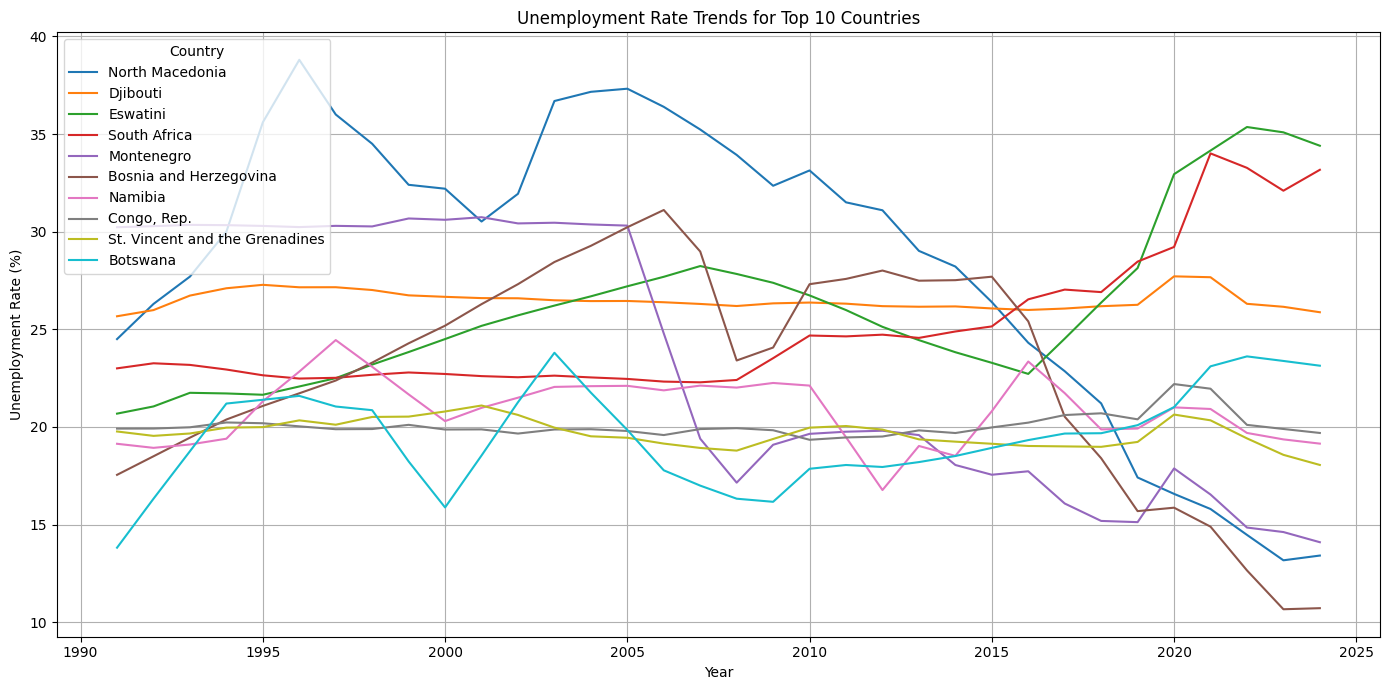

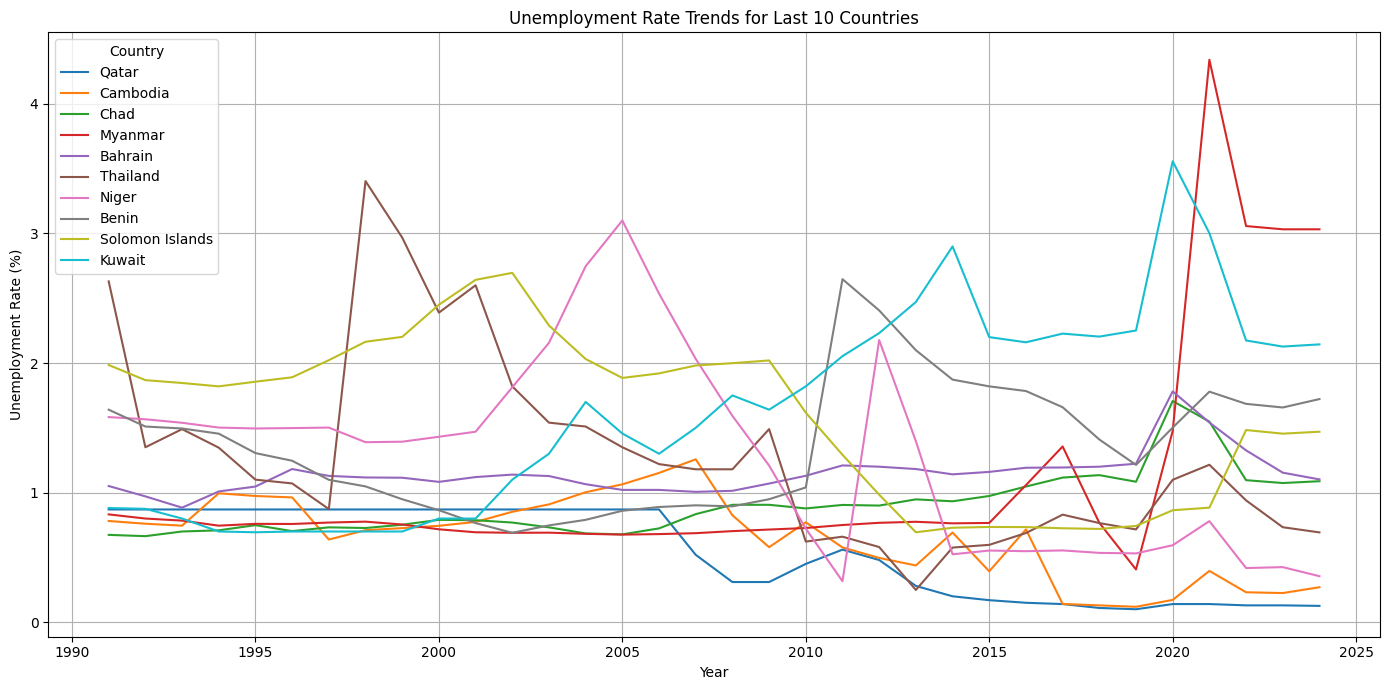

In [34]:
# Reshape the top 10 and last 10 dataframes to long format for plotting
top_10_long = top_10_unemployment.melt(id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', 'Average Unemployment Rate'],
                                       var_name='Year', value_name='Unemployment Rate')
last_10_long = last_10_unemployment.melt(id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', 'Average Unemployment Rate'],
                                         var_name='Year', value_name='Unemployment Rate')
display(top_10_long)
display(last_10_long)
# Convert 'Year' column to numeric
top_10_long['Year'] = pd.to_numeric(top_10_long['Year'])
last_10_long['Year'] = pd.to_numeric(last_10_long['Year'])

# Plot the unemployment rate trends for the top 10 countries
plt.figure(figsize=(14, 7))
sns.lineplot(data=top_10_long, x='Year', y='Unemployment Rate', hue='Country Name')
plt.title('Unemployment Rate Trends for Top 10 Countries')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate (%)')
plt.legend(title='Country', loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot the unemployment rate trends for the last 10 countries
plt.figure(figsize=(14, 7))
sns.lineplot(data=last_10_long, x='Year', y='Unemployment Rate', hue='Country Name')
plt.title('Unemployment Rate Trends for Last 10 Countries')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate (%)')
plt.legend(title='Country', loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

In [35]:
import plotly.express as px

# Create an interactive line plot for the top 10 countries
fig = px.line(top_10_long,
              x='Year',
              y='Unemployment Rate',
              color='Country Name',
              title='Interactive Unemployment Rate Trends for Top 10 Countries')

# Update layout for better readability
fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Unemployment Rate (%)',
    legend_title='Country'
)

fig.show()

In [36]:
import plotly.express as px

# Create an interactive line plot for the last 10 countries
fig = px.line(last_10_long,
              x='Year',
              y='Unemployment Rate',
              color='Country Name',
              title='Interactive Unemployment Rate Trends for Last 10 Countries')

# Update layout for better readability
fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Unemployment Rate (%)',
    legend_title='Country'
)

fig.show()

# Unemployment rate change for INDIA

In [39]:
india_df = df[df['Country Name'] == 'India'].melt(id_vars=['Country Name', 'Country Code','Indicator Name', 'Indicator Code'],
                                                  var_name='Year', value_name='Unemployment Rate')
display(india_df)

# Filter out non-year values from the 'Year' column
india_df = india_df[india_df['Year'].str.isnumeric()]

india_df['Year'] = pd.to_numeric(india_df['Year'])

fig = px.line(india_df,
              x='Year',
              y='Unemployment Rate',
              title='Unemployment Rate Trend for India')

fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Unemployment Rate (%)'
)

fig.show()

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Unemployment Rate
0,India,IND,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,1991,7.722000
1,India,IND,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,1992,7.733000
2,India,IND,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,1993,7.750000
3,India,IND,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,1994,7.645000
4,India,IND,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,1995,7.608000
5,India,IND,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,1996,7.558000
6,India,IND,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,1997,7.610000
7,India,IND,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,1998,7.639000
8,India,IND,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,1999,7.617000
9,India,IND,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,2000,7.624000


/tmp/ipython-input-3459395669.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



From 1991 to ~2018, the unemployment rate in India remained stable, fluctuating between 7.5% and 7.8%.

There is no major spike during the 2008 global financial crisis, meaning India’s labor market wasn’t heavily impacted then.

After 2018, there are sharp fluctuations.
Around 2019, unemployment dropped sharply to ~6.5%.

Possible reasons:

Economic policy changes.
In 2020, unemployment shot up close to ~7.9%.

This aligns with the COVID-19 pandemic:

Nationwide lockdown.

The 2008 global financial crisis didn’t cause a visible spike in India’s unemployment.

Reasons:

India’s economy was relatively less exposed to global financial markets then.

A large part of employment is in the informal sector, which is less directly linked to global trade shocks.

# Unemployment rate for different countries

In [40]:
selected_countries = ['India', 'United States', 'Pakistan', 'Russian Federation', 'China', 'United Kingdom', 'Sri Lanka','Germany','Israel','Ukraine']
selected_df = df[df['Country Name'].isin(selected_countries)]
display(selected_df)

,Country Name,Country Code,Indicator Name,Indicator Code,1991,1992,1993,1994,1995,1996,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Average Unemployment Rate
40,China,CHN,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,2.370,2.370,2.690,2.900,3.000,3.120,...,4.560,4.470,4.310,4.560,5.000,4.550,4.980,4.670,4.571,4.069441
55,Germany,DEU,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,5.316,6.323,7.675,8.727,8.158,8.822,...,4.104,3.781,3.384,3.163,3.881,3.594,3.120,3.068,3.406,6.722971
81,United Kingdom,GBR,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,8.550,9.772,10.346,9.648,8.694,8.189,...,4.867,4.452,4.120,3.613,4.472,4.826,3.730,3.984,4.111,6.183088
109,India,IND,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,7.722,7.733,7.750,7.645,7.608,7.558,...,7.601,7.618,7.652,6.510,7.859,6.380,4.822,4.172,4.202,7.293176
115,Israel,ISR,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,13.387,14.080,12.741,9.934,8.782,8.455,...,4.723,4.140,3.917,3.731,4.169,4.812,3.695,3.596,3.150,8.396471
138,Sri Lanka,LKA,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,14.661,14.220,13.820,13.030,12.270,11.350,...,4.242,4.046,4.318,4.670,5.364,4.981,4.528,5.997,4.996,7.323441
184,Pakistan,PAK,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,0.611,0.596,0.610,0.617,0.632,0.616,...,2.285,3.215,4.083,4.830,6.127,6.338,5.485,5.408,5.472,1.999265
202,Russian Federation,RUS,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,5.068,5.181,5.883,8.131,9.449,9.665,...,5.591,5.238,4.871,4.513,5.620,4.749,3.867,3.076,2.527,6.924559
248,Ukraine,UKR,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,1.900,1.900,2.000,2.000,5.620,7.650,...,9.350,9.500,8.799,8.194,9.475,9.834,NaN,NaN,NaN,7.854548
251,United States,USA,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,6.800,7.500,6.900,6.119,5.650,5.451,...,4.869,4.355,3.896,3.669,8.055,5.349,3.650,3.638,4.106,5.723588


In [64]:
selected_countries_long = selected_df.melt(id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', 'Average Unemployment Rate'],
                                       var_name='Year', value_name='Unemployment Rate')
display(selected_countries_long)
# Filter out non-year values from the 'Year' column
selected_countries_long = selected_countries_long[selected_countries_long['Year'].str.isnumeric()]

selected_countries_long['Year'] = pd.to_numeric(selected_countries_long['Year'])
fig = px.line(selected_countries_long,
              x='Year',
              y='Unemployment Rate',
              color='Country Name',
              title='Unemployment Rate Trends for Selected Countries')

fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Unemployment Rate (%)',
    legend_title='Country'
)

fig.show()

,Country Name,Country Code,Indicator Name,Indicator Code,Average Unemployment Rate,Year,Unemployment Rate
0,China,CHN,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,4.069441,1991,2.370
1,Germany,DEU,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,6.722971,1991,5.316
2,United Kingdom,GBR,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,6.183088,1991,8.550
3,India,IND,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,7.293176,1991,7.722
4,Israel,ISR,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,8.396471,1991,13.387
...,...,...,...,...,...,...,...
335,Sri Lanka,LKA,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,7.323441,2024,4.996
336,Pakistan,PAK,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,1.999265,2024,5.472
337,Russian Federation,RUS,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,6.924559,2024,2.527
338,Ukraine,UKR,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,7.854548,2024,NaN


#Pre-covid and post-covid comparisons

In [42]:
# Define pre and post COVID periods
pre_covid = [str(year) for year in range(2015, 2020)]
post_covid = [str(year) for year in range(2020, 2025)]

# Calculate average unemployment for pre and post COVID periods
pre_covid_avg = selected_df[pre_covid].mean(axis=1)
post_covid_avg = selected_df[post_covid].mean(axis=1)

# Create a new dataframe for comparison
comparison_df = pd.DataFrame({
    'Country Name': selected_df['Country Name'],
    'Pre-COVID Avg (2015-2019)': pre_covid_avg,
    'Post-COVID Avg (2020-2024)': post_covid_avg
})

display(comparison_df)

,Country Name,Pre-COVID Avg (2015-2019),Post-COVID Avg (2020-2024)
40,China,4.5100,4.7542
55,Germany,3.8088,3.4138
81,United Kingdom,4.5138,4.2246
109,India,7.4024,5.4870
115,Israel,4.3374,3.8844
138,Sri Lanka,4.3590,5.1732
184,Pakistan,3.5958,5.7660
202,Russian Federation,5.1656,3.9678
248,Ukraine,8.9966,9.6545
251,United States,4.4138,4.9596


In [44]:
import plotly.express as px

# Reshape the comparison_df to long format for plotting
comparison_long = comparison_df.melt(id_vars='Country Name', var_name='Period', value_name='Average Unemployment Rate')
display(comparison_long)
# Create a bar plot
fig = px.bar(comparison_long,
             x='Country Name',
             y='Average Unemployment Rate',
             color='Period',
             barmode='group',
             title='Average Unemployment Rate Comparison: Pre and Post COVID-19')

# Update layout for better readability
fig.update_layout(
    xaxis_title='Country',
    yaxis_title='Average Unemployment Rate (%)',
    legend_title='Period'
)

fig.show()

,Country Name,Period,Average Unemployment Rate
0,China,Pre-COVID Avg (2015-2019),4.5100
1,Germany,Pre-COVID Avg (2015-2019),3.8088
2,United Kingdom,Pre-COVID Avg (2015-2019),4.5138
3,India,Pre-COVID Avg (2015-2019),7.4024
4,Israel,Pre-COVID Avg (2015-2019),4.3374
5,Sri Lanka,Pre-COVID Avg (2015-2019),4.3590
6,Pakistan,Pre-COVID Avg (2015-2019),3.5958
7,Russian Federation,Pre-COVID Avg (2015-2019),5.1656
8,Ukraine,Pre-COVID Avg (2015-2019),8.9966
9,United States,Pre-COVID Avg (2015-2019),4.4138


Key Observations:

Countries with Significant Unemployment Increase

Pakistan, Sri Lanka, Ukraine, USA

Causes: COVID-induced job losses, economic crises, and geopolitical factors.

Countries with Improved Unemployment Rates

India, Russia, Germany, Israel, UK

Possible reasons:

India: Growth of gig economy, rural job schemes (MGNREGA), informal sector absorption.

Russia: Economic restructuring & alternative labor absorption.

Germany & Israel: Strong welfare systems, effective recovery policies.

# Financial crisis
Pre-crisis period: 2005 – 2007,

Crisis period: 2008 – 2009,

 Post-crisis recovery: 2010 – 2013

In [48]:
# Define the periods for global financial crisis analysis
pre_crisis_years = [str(year) for year in range(2005, 2008)]
crisis_years = [str(year) for year in range(2008, 2010)]
post_crisis_recovery_years = [str(year) for year in range(2010, 2014)]

# Calculate average unemployment for each period
pre_crisis_avg = selected_df[pre_crisis_years].mean(axis=1)
crisis_avg = selected_df[crisis_years].mean(axis=1)
post_crisis_avg = selected_df[post_crisis_recovery_years].mean(axis=1)

# Create a new dataframe for comparison
crisis_comparison_df = pd.DataFrame({
    'Country Name': selected_df['Country Name'],
    'Pre-Crisis Avg (2005-2007)': pre_crisis_avg,
    'Crisis Avg (2008-2009)': crisis_avg,
    'Post-Crisis Recovery Avg (2010-2013)': post_crisis_avg
})

display(crisis_comparison_df)

,Country Name,Pre-Crisis Avg (2005-2007),Crisis Avg (2008-2009),Post-Crisis Recovery Avg (2010-2013)
40,China,4.433333,4.6550,4.56500
55,Germany,10.067333,7.6940,5.92450
81,United Kingdom,5.196000,6.6660,8.01175
109,India,7.555000,7.6600,7.66125
115,Israel,10.476000,8.6190,7.12950
138,Sri Lanka,6.713333,5.5350,4.24200
184,Pakistan,0.521667,0.4790,2.01750
202,Russian Federation,6.727000,7.2530,6.24375
248,Ukraine,6.780333,7.6015,7.66250
251,United States,4.776333,7.5190,8.50650


In [51]:
import plotly.express as px

# Reshape the gfc_comparison_df to long format for plotting
crisis_comparison_long = crisis_comparison_df.melt(id_vars='Country Name', var_name='Period', value_name='Average Unemployment Rate')

# Create a bar plot
fig = px.bar(crisis_comparison_long,
             x='Country Name',
             y='Average Unemployment Rate',
             color='Period',
             barmode='group',
             title='Average Unemployment Rate Comparison: Global Financial Crisis')

# Update layout for better readability
fig.update_layout(
    xaxis_title='Country',
    yaxis_title='Average Unemployment Rate (%)',
    legend_title='Period'
)

fig.show()

Developed economies (US, UK, Ukraine) suffered the most prolonged damage.

Emerging economies (India, China, Sri Lanka) were less affected and recovered faster.

Countries with strong labor protections and stimulus policies (Germany, Israel) managed to reduce unemployment after the crisis.

# Income based distribution

In [58]:
# Select the country groupings of interest
selected_groups = ['High income', 'Heavily indebted poor countries (HIPC)', 'Least developed countries: UN classification', 'Low income', 'Middle income', 'Upper middle income', 'Lower middle income']
selected_groups_df = df[df['Country Name'].isin(selected_groups)]

# Calculate the average unemployment rate for each selected group across the year columns
selected_groups_df['Average Unemployment Rate'] = selected_groups_df[year_columns].mean(axis=1)

# Display the average unemployment rates for the selected groups
display("Average Unemployment Rate for Selected Country Groupings:", selected_groups_df[['Country Name', 'Average Unemployment Rate']])

# Create a bar plot for the average unemployment rates of selected groups
fig = px.bar(selected_groups_df,
             x='Country Name',
             y='Average Unemployment Rate',
             title='Average Unemployment Rate by Country Grouping')

# Update layout for better readability
fig.update_layout(
    xaxis_title='Country Grouping',
    yaxis_title='Average Unemployment Rate (%)'
)

fig.show()

/tmp/ipython-input-2658879592.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



'Average Unemployment Rate for Selected Country Groupings:'

,Country Name,Average Unemployment Rate
95,High income,6.702447
98,Heavily indebted poor countries (HIPC),4.743667
135,Least developed countries: UN classification,4.815899
136,Low income,5.387918
139,Lower middle income,5.945726
156,Middle income,5.758779
249,Upper middle income,5.653961


A. High-Income Countries Face Higher Unemployment

Economies like the US, UK, and parts of Europe have formal labor markets, making job losses more visible in unemployment statistics.

During crises, layoffs are quickly reflected in data.

B. Developing Countries Show Lower Unemployment

Low-income & HIPC countries show relatively lower reported unemployment, but:

This doesn’t mean people are better off.

Most workers are in informal or subsistence jobs, so unemployment is undercounted.

C. Middle-Income Countries Are in Transition

Countries like Brazil, South Africa, Indonesia fall here.

Moderate unemployment indicates diversified economies but limited job creation.

In [60]:
# Filter the original dataframe for the selected income groupings
income_groups_df = df[df['Country Name'].isin(selected_groups)]

# Melt the dataframe to long format for plotting
income_groups_long = income_groups_df.melt(id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', 'Average Unemployment Rate'],
                                       var_name='Year', value_name='Unemployment Rate')

# Filter out non-year values from the 'Year' column
income_groups_long = income_groups_long[income_groups_long['Year'].str.isnumeric()]

# Convert 'Year' column to numeric
income_groups_long['Year'] = pd.to_numeric(income_groups_long['Year'])

# Create an interactive line plot for the income groupings
fig = px.line(income_groups_long,
              x='Year',
              y='Unemployment Rate',
              color='Country Name',
              title='Unemployment Rate Trends for Country Income Groupings')

# Update layout for better readability
fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Unemployment Rate (%)',
    legend_title='Country Grouping'
)

fig.show()